In [17]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime
import seaborn as sns
%matplotlib inline 
import json
import warnings

In [18]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('tweet.csv')

In [3]:
df.head()

,tweet_id,global brands,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
df.columns

Index(['tweet_id', 'global brands', 'sentiment', 'text'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       1000 non-null   int64 
 1   global brands  1000 non-null   object
 2   sentiment      1000 non-null   object
 3   text           1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe

<bound method NDFrame.describe of      tweet_id        global brands   sentiment  \
0        3364             Facebook  Irrelevant   
1         352               Amazon     Neutral   
2        8312            Microsoft    Negative   
3        4371                CS-GO    Negative   
4        4433               Google     Neutral   
..        ...                  ...         ...   
995      4891  GrandTheftAuto(GTA)  Irrelevant   
996      4359                CS-GO  Irrelevant   
997      2652          Borderlands    Positive   
998      8069            Microsoft    Positive   
999      6960      johnson&johnson     Neutral   

                                                  text  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                     

In [7]:
df.isnull()

,tweet_id,global brands,sentiment,text
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [8]:
def get_sentiment_label(text, threshold=0.2):
    analysis = TextBlob(str(text))
    # Assign labels based on sentiment polarity
    if analysis.sentiment.polarity > threshold:
        return 'positive'
    elif analysis.sentiment.polarity < -threshold:
        return 'negative'
    else:
        return 'neutral'

In [9]:
df['predicted_sentiment'] = df['text'].apply(get_sentiment_label)

In [10]:
sentiment_counts = df['predicted_sentiment'].value_counts()

Plotting Graphs

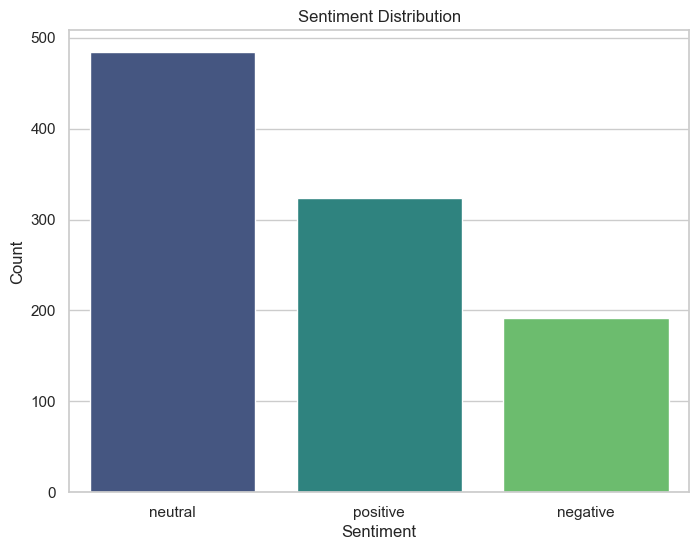

In [12]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette="viridis", dodge=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

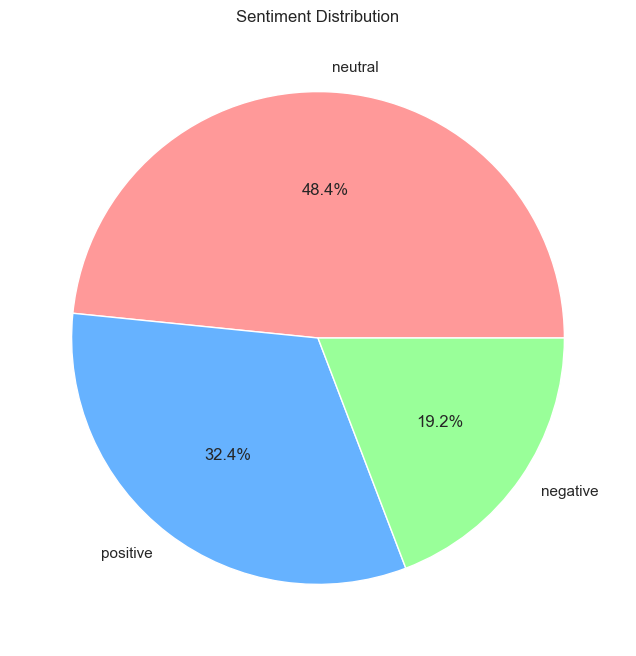

In [42]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99']  
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Sentiment Distribution')
plt.show()

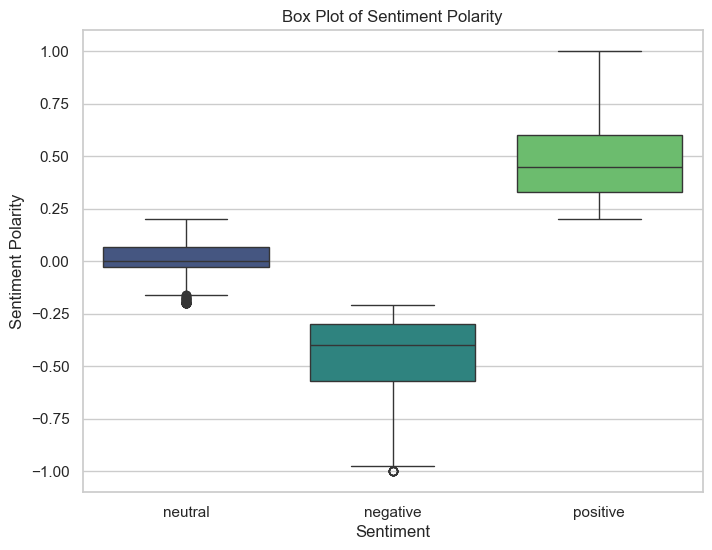

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='predicted_sentiment', y=df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity), data=df, palette="viridis")
plt.title('Box Plot of Sentiment Polarity')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Polarity')
plt.show()

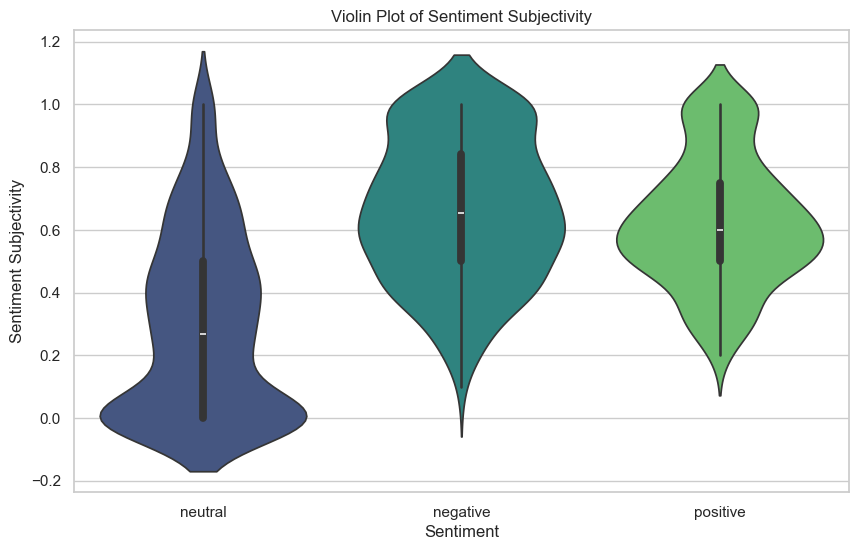

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['predicted_sentiment'], y=df['text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity), palette="viridis")
plt.title('Violin Plot of Sentiment Subjectivity')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Subjectivity')
plt.show()

In [25]:
print(df.dtypes)

tweet_id                int64
global brands          object
sentiment              object
text                   object
predicted_sentiment    object
dtype: object


In [29]:
df.columns = df.columns.str.strip()

Printing Unique values of Sentiment and Global brands

In [37]:
df.columns = df.columns.str.strip()
print(df['sentiment'].unique())

['Irrelevant' 'Neutral' 'Negative' 'Positive']


In [38]:
print(df['global brands'].unique())

['Facebook' 'Amazon' 'Microsoft' 'CS-GO' 'Google' 'FIFA' 'MaddenNFL'
 'TomClancysRainbowSix' 'AssassinsCreed' 'CallOfDuty' 'Dota2' 'Verizon'
 'NBA2K' 'Nvidia' 'GrandTheftAuto(GTA)' 'RedDeadRedemption(RDR)'
 'Hearthstone' 'ApexLegends' 'Overwatch'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Borderlands' 'PlayStation5(PS5)'
 'johnson&johnson' 'Fortnite' 'Xbox(Xseries)' 'CallOfDutyBlackopsColdWar'
 'HomeDepot' 'Cyberpunk2077' 'TomClancysGhostRecon' 'WorldOfCraft'
 'LeagueOfLegends' 'Battlefield']


Plot stacked bar chart for sentiment distribution across global brands

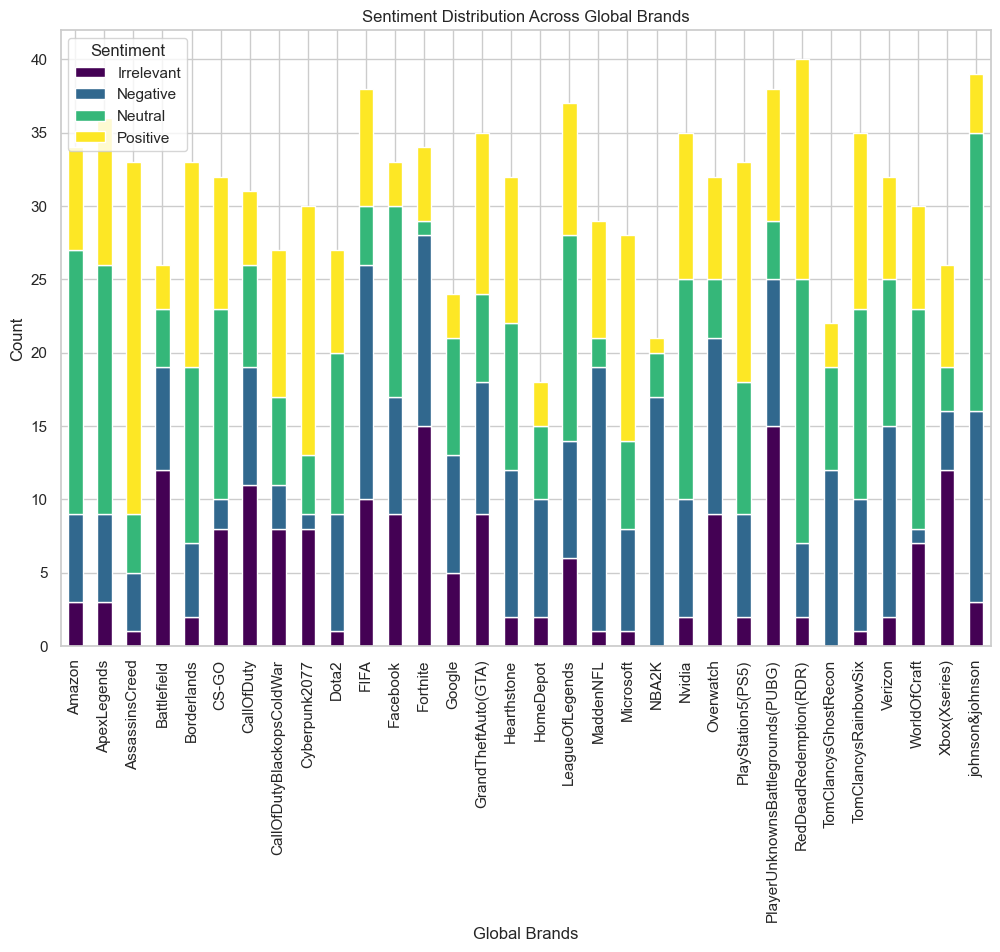

In [39]:
brand_sentiment_counts = df.groupby(['global brands', 'sentiment']).size().unstack(fill_value=0)

brand_sentiment_counts.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12, 8))
plt.title('Sentiment Distribution Across Global Brands')
plt.xlabel('Global Brands')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()